1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [35]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [36]:
%pwd

'D:\\Information system\\Sem 1\\Info 6105\\Assignment 3'

In [37]:
!ls

001585510_Tharoon Kumar Viswanathan_Assignment3_1.ipynb
001585510_TharoonKumarViswanathan_Assignment2_4.ipynb
001585510_TharoonKumarViswanathan_Assignment3_2.ipynb
DNN for Classification (1).ipynb
Module VII classification.ipynb
Module VII regression.ipynb
Module_III_code.ipynb
diabetes.csv
heart.csv
pima-indians-diabetes(2).data
train.csv


In [38]:
path = 'D:\\Information system\\Sem 1\\Info 6105\\Assignment 3'

In [39]:
df = pd.read_csv(f'{path}\\pima-indians-diabetes(2).data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split

In [40]:
#Separate out X and Y

X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

# pre-process the data by scaling/standardizing the 8 columns

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_sc = pd.DataFrame(scaler.transform(X))
print(X_sc.shape)
X_sc.head(2)

(768, 8)


,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672


# Split Dataset into 1.Train, 2.Valid and 3.Test

In [42]:
# Train- Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X_sc, Y, test_size=0.43, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(437, 8) (331, 8) (437, 1) (331, 1)


In [43]:
print(X_test.shape,Y_test.shape)

(331, 8) (331, 1)


In [44]:
(X_valid,X_Test,Y_valid,Y_Test) = train_test_split(X_test, Y_test, test_size=0.50, random_state=1)
print(X_valid.shape,X_Test.shape,Y_valid.shape,Y_Test.shape)

(165, 8) (166, 8) (165, 1) (166, 1)


# Build and compile a deep learning model

In [45]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, kernel_initializer="glorot_uniform",input_dim=8, activation='relu'))
model.add(Dense(8, kernel_initializer="glorot_uniform",activation='relu'))
model.add(Dense(1, kernel_initializer="glorot_uniform",activation='sigmoid'))

In [46]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# Fit the DNN with your train data
#Train using train data and validate with valid data
DL_model= model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=100, batch_size=5)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6680 - accuracy: 0.6237 - val_loss: 0.6350 - val_accuracy: 0.6364
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7516 - val_loss: 0.5917 - val_accuracy: 0.6485
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7351 - val_loss: 0.5675 - val_accuracy: 0.6727
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7325 - val_loss: 0.5492 - val_accuracy: 0.7212
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7612 - val_loss: 0.5371 - val_accuracy: 0.7455
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7916 - val_loss: 0.5262 - val_accuracy: 0.7636
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7384 - val_loss: 0.5210 - val_accuracy: 0.7818
Epoch 8/100
8

Epoch 59/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8222 - val_loss: 0.5399 - val_accuracy: 0.7455
Epoch 60/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.7759 - val_loss: 0.5442 - val_accuracy: 0.7455
Epoch 61/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8222 - val_loss: 0.5463 - val_accuracy: 0.7455
Epoch 62/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8053 - val_loss: 0.5452 - val_accuracy: 0.7455
Epoch 63/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8189 - val_loss: 0.5448 - val_accuracy: 0.7455
Epoch 64/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.7937 - val_loss: 0.5499 - val_accuracy: 0.7455
Epoch 65/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8344 - val_loss: 0.5501 - val_accuracy: 0.7455
Epoch 

# Make Epoch versus train set accuracy, and validation set accuracy

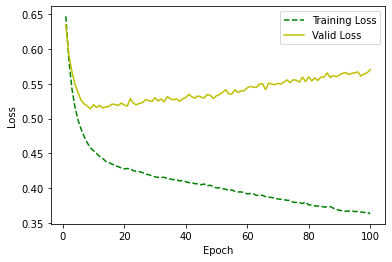

In [48]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = DL_model.history['loss']
test_loss = DL_model.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Loss', 'Valid Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

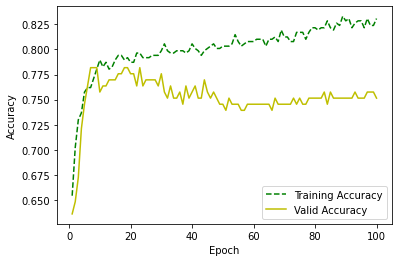

In [49]:
# Get training and test loss histories
training_loss = DL_model.history['accuracy']
test_loss = DL_model.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [50]:
# Evaluate the model using test data
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

11/11 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7674
Accuracy: 76.74%


# Report results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

In [51]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
DNN_Pred = model.predict(X_test).ravel()
rec, fall_out, thresholds = roc_curve(Y_test,DNN_Pred)

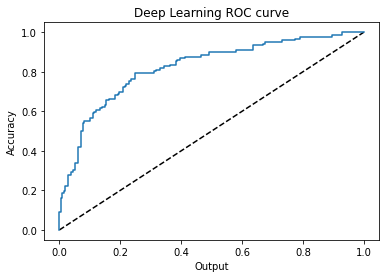

In [52]:

rec, fall_out, thresholds = roc_curve(Y_test,DNN_Pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

In [53]:
roc_auc_score(Y_test,DNN_Pred)

0.821711506784846

In [54]:
DNN_Pred = model.predict(X_test).ravel()
rec, fall_out, thresholds = roc_curve(Y_test,DNN_Pred)

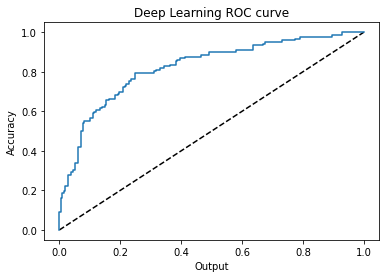

In [55]:

from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_test,DNN_Pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

In [56]:
roc_auc_score(Y_test,DNN_Pred)

0.821711506784846

Some of the methods used to increase the Dataset is: 1.Normal generation Method, 2. Uniform generation Method

# Increase Dataset Size using Normal generation Method

In [57]:
df_norm = pd.read_csv(f'{path}\\pima-indians-diabetes(2).data',header = None)
print(df_norm.shape)
df_norm.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [58]:
columns = df_norm.columns.to_numpy()
iteration_count = 2
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in df_norm.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,15, dtype='int')
            data_obj[columns[j]] = df.loc[random_index][columns[j]]
        new_df = new_df.append(data_obj, ignore_index=True)

Norm_data = df_norm.append(new_df, ignore_index=True)
Norm_data.shape
Norm_data.tail()

,0,1,2,3,4,5,6,7,8
2299,10.0,139.0,40.0,0.0,88.0,23.3,0.232,50.0,1.0
2300,1.0,78.0,74.0,23.0,175.0,33.6,0.201,57.0,1.0
2301,1.0,189.0,92.0,29.0,543.0,26.6,0.351,26.0,0.0
2302,5.0,125.0,92.0,23.0,0.0,28.1,0.587,31.0,1.0
2303,1.0,168.0,70.0,29.0,0.0,26.6,0.587,54.0,0.0


In [59]:
#Separate out X and Y

X_norm = Norm_data.iloc[:, :8]
Y_norm = Norm_data.iloc[:, 8:9]
print(X_norm.shape)

(2304, 8)


In [60]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_norm)
X_scn = pd.DataFrame(scaler.transform(X_norm))
print(X_scn.shape)
X_scn.head(2)

(2304, 8)


,0,1,2,3,4,5,6,7
0,0.419741,0.452117,0.253431,1.088365,-0.548512,0.389527,0.187455,1.019128
1,-1.025393,-1.264575,-0.030041,0.715886,-0.548512,-0.367987,-0.353818,-0.498230


In [61]:
# Train- Test Split
(X_trainm, X_testm, Y_trainm, Y_testm) = train_test_split(X_scn, Y_norm, test_size=0.43, random_state=1)
print(X_trainm.shape,X_testm.shape,Y_trainm.shape,Y_testm.shape)

(1313, 8) (991, 8) (1313, 1) (991, 1)


In [62]:
print(X_testm.shape,Y_testm.shape)

(991, 8) (991, 1)


In [63]:
(X_validm,X_Testm,Y_validm,Y_Testm) = train_test_split(X_testm, Y_testm, test_size=0.50, random_state=1)
print(X_validm.shape,X_Testm.shape,Y_validm.shape,Y_Testm.shape)

(495, 8) (496, 8) (495, 1) (496, 1)


In [64]:
model = Sequential()
model.add(Dense(10, kernel_initializer="glorot_uniform",input_dim=8, activation='relu'))
model.add(Dense(8, kernel_initializer="glorot_uniform",activation='relu'))
model.add(Dense(1, kernel_initializer="glorot_uniform",activation='sigmoid'))
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the DNN with your train data

DL_modelm= model.fit(X_trainm, Y_trainm, validation_data=(X_validm, Y_validm), epochs=100, batch_size=5)

Epoch 1/100
263/263 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5322 - val_loss: 0.6771 - val_accuracy: 0.5515
Epoch 2/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5509 - val_loss: 0.6666 - val_accuracy: 0.6101
Epoch 3/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5663 - val_loss: 0.6569 - val_accuracy: 0.6364
Epoch 4/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6282 - val_loss: 0.6496 - val_accuracy: 0.6343
Epoch 5/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6026 - val_loss: 0.6423 - val_accuracy: 0.6263
Epoch 6/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6242 - val_loss: 0.6397 - val_accuracy: 0.6364
Epoch 7/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6342 - val_loss: 0.6366 - val_accuracy: 0.6364

Epoch 58/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.6656 - val_loss: 0.6664 - val_accuracy: 0.5899
Epoch 59/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6571 - val_loss: 0.6696 - val_accuracy: 0.5899
Epoch 60/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.6965 - val_loss: 0.6661 - val_accuracy: 0.5939
Epoch 61/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.6841 - val_loss: 0.6675 - val_accuracy: 0.5939
Epoch 62/100
263/263 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6759 - val_loss: 0.6713 - val_accuracy: 0.6040
Epoch 63/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.6905 - val_loss: 0.6764 - val_accuracy: 0.5818
Epoch 64/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.6760 - val_loss: 0.6699 - val_accuracy:

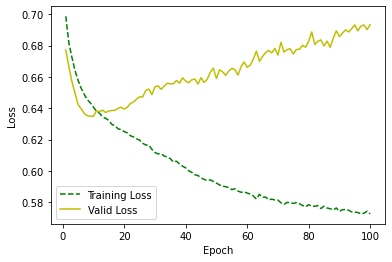

In [65]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = DL_modelm.history['loss']
test_loss = DL_modelm.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Loss', 'Valid Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

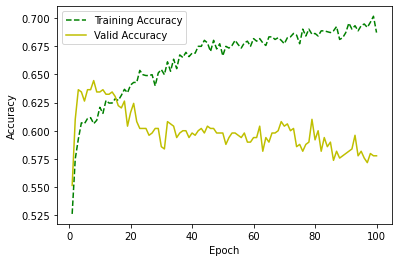

In [66]:
# Get training and test loss histories
training_loss = DL_modelm.history['accuracy']
test_loss = DL_modelm.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [67]:
# Evaluate the model
scores = model.evaluate(X_testm, Y_testm)
print ("Accuracy: %.2f%%" %(scores[1]*100))

31/31 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5863
Accuracy: 58.63%


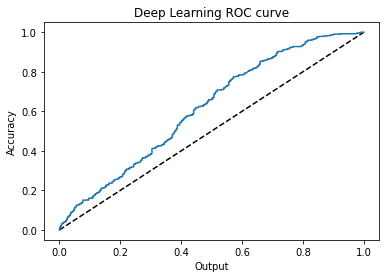

0.6147244879611619

In [68]:
DNN_Predm = model.predict(X_testm).ravel()
rec, fall_out, thresholds = roc_curve(Y_testm,DNN_Predm)

from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_testm,DNN_Predm)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

roc_auc_score(Y_testm,DNN_Predm)

# Increase Dataset Size using Uniform generation Method

In [69]:
df_unif = pd.read_csv(f'{path}\\pima-indians-diabetes(2).data',header = None)
print(df_unif.shape)
df_unif.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [70]:
#Uniform Generation
columns = df_unif.columns.to_numpy()
iteration_count = 2
new_dfu = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in df.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index_1 = np.random.randint(0,15)
            data_obj[columns[j]] = df.loc[random_index_1][columns[j]]
            
        new_dfu = new_dfu.append(data_obj, ignore_index=True)

df_unif = df_unif.append(new_dfu, ignore_index=True)
df_unif.shape
df_unif.tail()

,0,1,2,3,4,5,6,7,8
2299,1.0,148.0,96.0,35.0,0.0,25.8,0.134,51.0,0.0
2300,10.0,115.0,60.0,0.0,0.0,30.1,0.537,21.0,1.0
2301,8.0,85.0,60.0,0.0,0.0,28.1,0.158,30.0,1.0
2302,2.0,115.0,74.0,19.0,88.0,25.6,0.627,32.0,1.0
2303,1.0,189.0,72.0,0.0,0.0,37.6,0.134,30.0,1.0


In [71]:
#Separate out X and Y

X_uni = df_unif.iloc[:, :8]
Y_uni = df_unif.iloc[:, 8:9]
print(X_uni.shape)

(2304, 8)


In [72]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_uni)
X_scu = pd.DataFrame(scaler.transform(X_uni))
print(X_scu.shape)
X_scu.head(2)

(2304, 8)


,0,1,2,3,4,5,6,7
0,0.432951,0.431091,0.259633,1.070832,-0.55571,0.408388,0.223332,0.985688
1,-1.012728,-1.313318,-0.021056,0.701085,-0.55571,-0.319714,-0.333914,-0.522086


In [73]:
# Train- Test Split
(X_trainu, X_testu, Y_trainu, Y_testu) = train_test_split(X_scu, Y_uni, test_size=0.43, random_state=1)
print(X_trainu.shape,X_testu.shape,Y_trainu.shape,Y_testu.shape)

(1313, 8) (991, 8) (1313, 1) (991, 1)


In [74]:
(X_validu,X_Testu,Y_validu,Y_Testu) = train_test_split(X_testu, Y_testu, test_size=0.50, random_state=1)
print(X_validu.shape,X_Testu.shape,Y_validu.shape,Y_Testu.shape)

(495, 8) (496, 8) (495, 1) (496, 1)


In [75]:
model = Sequential()
model.add(Dense(10, kernel_initializer="glorot_uniform",input_dim=8, activation='relu'))
model.add(Dense(8, kernel_initializer="glorot_uniform",activation='relu'))
model.add(Dense(1, kernel_initializer="glorot_uniform",activation='sigmoid'))
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the DNN with your train data

DL_modelu= model.fit(X_trainu, Y_trainu, validation_data=(X_validu, Y_validu), epochs=100, batch_size=5)

Epoch 1/100
263/263 [==============================] - 1s 2ms/step - loss: 0.7414 - accuracy: 0.4692 - val_loss: 0.7133 - val_accuracy: 0.4485
Epoch 2/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6985 - val_accuracy: 0.5313
Epoch 3/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5745 - val_loss: 0.6914 - val_accuracy: 0.5576
Epoch 4/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6178 - val_loss: 0.6852 - val_accuracy: 0.5657
Epoch 5/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5834 - val_loss: 0.6791 - val_accuracy: 0.5939
Epoch 6/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.5990 - val_loss: 0.6740 - val_accuracy: 0.5980
Epoch 7/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.5993 - val_loss: 0.6707 - val_accuracy: 0.6061

Epoch 58/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6549 - val_loss: 0.6682 - val_accuracy: 0.6000
Epoch 59/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6699 - val_loss: 0.6735 - val_accuracy: 0.6000
Epoch 60/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.6758 - val_loss: 0.6721 - val_accuracy: 0.5899
Epoch 61/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6626 - val_loss: 0.6712 - val_accuracy: 0.5939
Epoch 62/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.6801 - val_loss: 0.6699 - val_accuracy: 0.6081
Epoch 63/100
263/263 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.6775 - val_loss: 0.6752 - val_accuracy: 0.5980
Epoch 64/100
263/263 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6738 - val_loss: 0.6736 - val_accuracy:

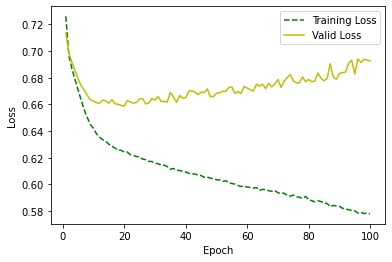

In [76]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = DL_modelu.history['loss']
test_loss = DL_modelu.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Loss', 'Valid Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

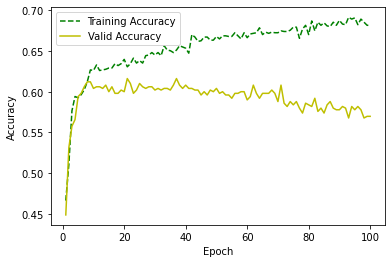

In [77]:
# Get training and test loss histories
training_loss = DL_modelu.history['accuracy']
test_loss = DL_modelu.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [78]:
# Evaluate the model
scores = model.evaluate(X_testu, Y_testu)
print ("Accuracy: %.2f%%" %(scores[1]*100))

31/31 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.5701
Accuracy: 57.01%


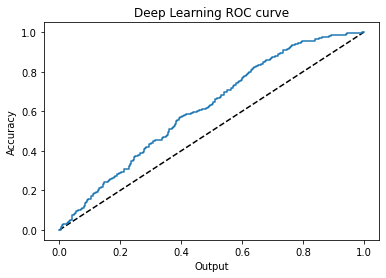

0.6159329654608624

In [79]:
DNN_Predu = model.predict(X_testu).ravel()
rec, fall_out, thresholds = roc_curve(Y_testu,DNN_Predu)

from sklearn.metrics import classification_report,roc_curve,roc_auc_score
rec, fall_out, thresholds = roc_curve(Y_testu,DNN_Predu)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Knn')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Deep Learning ROC curve')
plt.show()

roc_auc_score(Y_testu,DNN_Predu)

Accuracy Score for DNN model: 75.83%
AUC value: 0.810